# Use arima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giả sử dữ liệu của bạn được load vào dataframe df
df = pd.read_csv("../data/data.csv")
df['Adj Close'] = df['Adj Close'].interpolate(method='linear')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Chỉ quan tâm đến cột Adj Close
data = df['Adj Close']

# Phân chia dữ liệu
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train = data[:train_size]
test = data[train_size:]


In [4]:
train.head(10)

Date
1960-01-04    4.52
1960-01-05    4.55
1960-01-06    4.68
1960-01-07    4.63
1960-01-08    4.59
1960-01-11    4.54
1960-01-12    4.54
1960-01-13    4.56
1960-01-14    4.51
1960-01-15    4.49
Name: Adj Close, dtype: float64

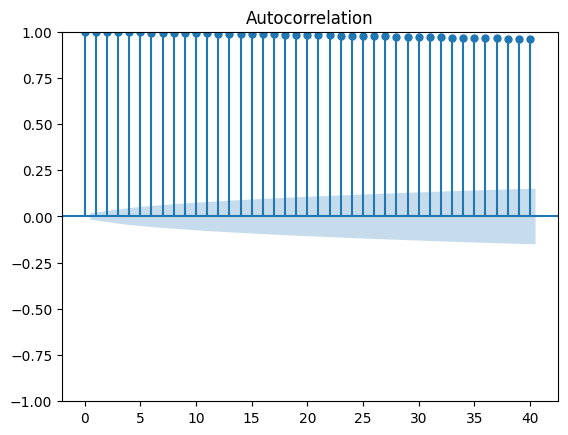

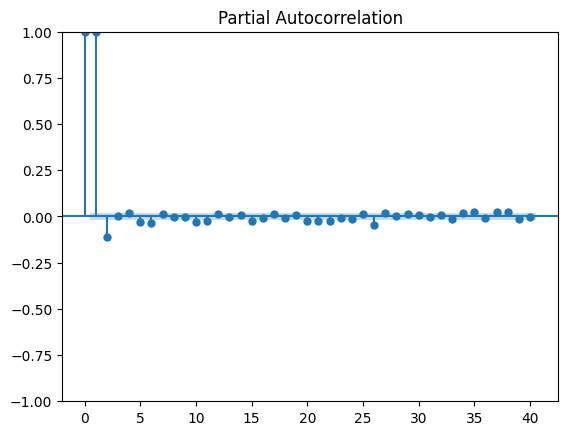

In [5]:
# Chon bac cua mo hinh ARIMA bang cach phan tich ACF va PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=40)
plt.show()

plot_pacf(train, lags=40)
plt.show()

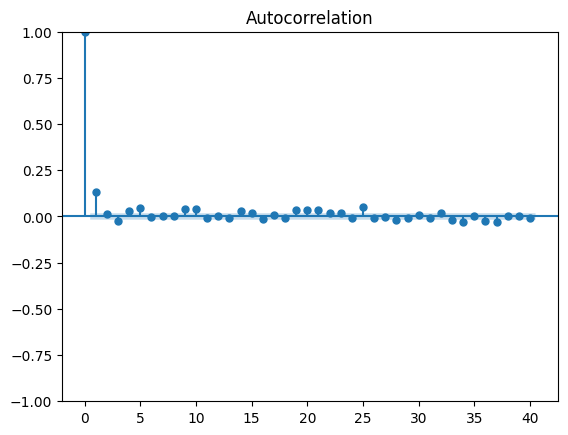

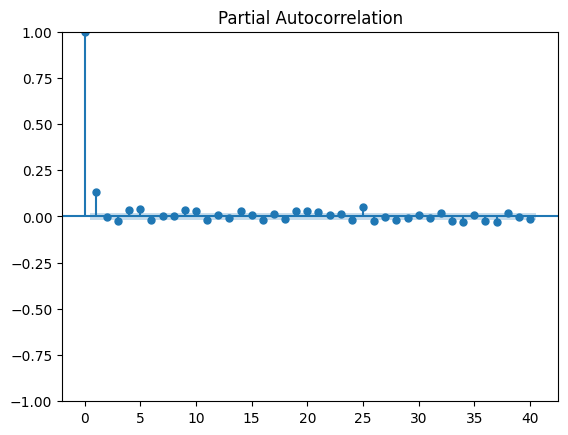

In [8]:
# Sai phan bac 1 cua du lieu roi kiem dinh acf, pacf
diff = train.diff().dropna()
plot_acf(diff, lags=40)
plt.show()

plot_pacf(diff, lags=40)
plt.show()

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Xây dựng mô hình ARIMA
model = ARIMA(train, order=(1, 1, 1))  # (p, d, q) là các tham số ARIMA
model_fit = model.fit()

# Thong số của mô hình
print(model_fit.summary())

/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                12983
Model:                 ARIMA(1, 1, 1)   Log Likelihood               12021.481
Date:                Tue, 26 Nov 2024   AIC                         -24036.962
Time:                        11:57:01   BIC                         -24014.548
Sample:                             0   HQIC                        -24029.472
                              - 12983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1064      0.023      4.671      0.000       0.062       0.151
ma.L1          0.0285      0.023      1.247      0.212      -0.016       0.073
sigma2         0.0092   2.95e-05    311.601      0.0

In [ ]:

# Dự báo với mô hình ARIMA
forecast = model_fit.forecast(steps=len(test_data))

# In ra kết quả dự báo
print(forecast)
# Vẽ kết quả dự báo
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index[-len(test_data):], test_data['Adj Close'], label='Thực tế')
plt.plot(df_cleaned.index[-len(test_data):], forecast, label='Dự báo ARIMA', linestyle='--')
plt.title('Dự báo lợi suất trái phiếu chính phủ Hoa Kỳ với ARIMA')
plt.xlabel('Ngày')
plt.ylabel('Lợi suất')
plt.legend()
plt.show()

ΔY_t​ =μ + ϕ1 ​Y_t−1 ​ + θ1 ​ϵ_t-1 ​ + ϵ_t 
ARIMA(2,1,2)

Dựa trên kết quả mô hình SARIMAX mà bạn cung cấp, dưới đây là phương trình mô hình với các tham số đã được ước lượng.

### Phương trình mô hình SARIMAX

Mô hình SARIMAX bạn đã chỉ ra có dạng:

$$
\Delta Y_t = \mu + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \sum_{s=1}^{S} \left( \phi_{S1} Y_{t-s} + \theta_{S1} \epsilon_{t-s} \right) + \epsilon_t
$$

Trong đó:
- \(Y_t\): Giá trị của biến phụ thuộc (ở đây là "Adj Close").
- \(\Delta Y_t\): Sự thay đổi của \(Y_t\) (biến động).
- \(\mu\): Hệ số trung bình của mô hình.
- \(\phi_1\) và \(\phi_2\): Các hệ số autoregressive (AR) cho các độ trễ 1 và 2.
- \(\theta_1\) và \(\theta_2\): Các hệ số moving average (MA) cho các độ trễ 1 và 2.
- \(\epsilon_t\): Phần dư (white noise) tại thời điểm \(t\).

### Các tham số ước lượng

Dựa trên bảng kết quả:

```markdown
| Tham số      | Giá trị  | Std Err | z       | P>|z|  | [0.025   | 0.975]   |
|--------------|----------|---------|---------|-------|----------|-----------|
| **ar.L1**    | 0.4422   | 0.662   | 0.667   | 0.504 | -0.856   | 1.741     |
| **ar.L2**    | -0.0418  | 0.120   | -0.349  | 0.727 | -0.276   | 0.193     |
| **ma.L1**    | -0.3581  | 0.663   | -0.540  | 0.589 | -1.657   | 0.941     |
| **ma.L2**    | 0.0172   | 0.072   | 0.239   | 0.811 | -0.124   | 0.158     |
| **ar.S.L7**  | -0.3110  | 0.059   | -5.298  | 0.000 | -0.426   | -0.196    |
| **ar.S.L14** | 0.0543   | 0.003   | 15.810  | 0.000 | 0.048    | 0.061     |
| **ma.S.L7**  | -0.6369  | 0.059   | -10.861 | 0.000 | -0.752   | -0.522    |
| **ma.S.L14** | -0.3473  | 0.058   | -6.003  | 0.000 | -0.461   | -0.234    |
| **sigma^2**  | 0.0055   | 1.64e-05| 335.099 | 0.000 | 0.005    | 0.006     |
```

### Phương trình đầy đủ

Phương trình mô hình SARIMAX cụ thể sẽ như sau:

$$
\Delta Y_t = \mu + 0.4422 \Delta Y_{t-1} - 0.0418 \Delta Y_{t-2} - 0.3581 \epsilon_{t-1} + 0.0172 \epsilon_{t-2} - 0.3110 Y_{t-7} + 0.0543 Y_{t-14} - 0.6369 \epsilon_{t-7} - 0.3473 \epsilon_{t-14} + \epsilon_t
$$

### Trong đó:
- \(Y_{t-k}\) là giá trị của chuỗi tại độ trễ k.
- \(\epsilon_t\) là phần dư tại thời điểm t, với phân phối chuẩn và phương sai \(\sigma^2\).

### Tóm tắt
- Mô hình SARIMAX này kết hợp các yếu tố autoregressive, moving average, và các yếu tố theo mùa (seasonal) để mô hình hóa và dự đoán sự biến động của giá trị đóng cửa điều chỉnh (Adj Close).
- Các tham số có trong mô hình cho phép nắm bắt các mối quan hệ phức tạp trong dữ liệu chuỗi thời gian.

Kiểm định ADF (Augmented Dickey-Fuller):
- H0 (Giả thuyết không): Chuỗi có rễ đơn vị (không ổn định).
- H1 (Giả thuyết thay thế): Chuỗi không có rễ đơn vị (ổn định).

Kiểm định Shapiro-Wilk:
- Giả thuyết không (H0): Dữ liệu có phân phối chuẩn.
- Giả thuyết thay thế (H1): Dữ liệu không có phân phối chuẩn.

Ljung-Box Test:
- H0: Không có tự tương quan.
- H1: Có tự tương quan.

Jarque-Bera Test:
- H0: Dữ liệu có phân phối chuẩn.
- H1: Dữ liệu không có phân phối chuẩn.

Heteroskedasticity Test:
- H0: Phương sai là không đổi.
- H1: Phương sai là không ổn định.

Kết quả bạn cung cấp liên quan đến một số kiểm định thống kê nhằm đánh giá các đặc điểm của chuỗi thời gian, bao gồm tính tự tương quan, phân phối chuẩn, và sự đồng biến thiên (heteroskedasticity). Dưới đây là giải thích chi tiết về từng thành phần:

### 1. **Ljung-Box Test**
- **Ljung-Box (L1) (Q)**: Đây là giá trị thống kê của kiểm định Ljung-Box, được sử dụng để kiểm tra xem có tồn tại tự tương quan trong các phần dư của mô hình hay không.
  - **Giá trị**: `0.00` cho thấy rằng giá trị thống kê là rất nhỏ, điều này thường chỉ ra rằng có thể có tự tương quan.
  
- **Prob(Q)**: Giá trị p-value tương ứng với kiểm định Ljung-Box.
  - **Giá trị**: `0.99` cho thấy rằng không có bằng chứng đủ mạnh để bác bỏ giả thuyết rằng các phần dư là độc lập (tức là không có tự tương quan). Một p-value cao (thường > 0.05) cho thấy rằng phần dư không có tự tương quan.

### 2. **Jarque-Bera Test**
- **Jarque-Bera (JB)**: Đây là giá trị thống kê của kiểm định Jarque-Bera, được sử dụng để kiểm tra xem phân phối của dữ liệu có phải là phân phối chuẩn hay không.
  - **Giá trị**: `1684922.64` là một giá trị rất lớn, cho thấy rằng dữ liệu có thể không phân phối chuẩn.
  
- **Prob(JB)**: Giá trị p-value tương ứng với kiểm định Jarque-Bera.
  - **Giá trị**: `0.00` cho thấy có đủ bằng chứng để bác bỏ giả thuyết rằng dữ liệu có phân phối chuẩn. Trong trường hợp này, p-value nhỏ (thường < 0.05) cho thấy rằng dữ liệu không tuân theo phân phối chuẩn.

### 3. **Heteroskedasticity Test**
- **Heteroskedasticity (H)**: Đây là giá trị thống kê kiểm tra sự đồng biến thiên trong mô hình. Heteroskedasticity xảy ra khi phương sai của các phần dư không ổn định theo thời gian.
  - **Giá trị**: `0.16` cho thấy rằng mức độ heteroskedasticity là tương đối thấp.

- **Prob(H)(two-sided)**: Giá trị p-value cho kiểm định heteroskedasticity.
  - **Giá trị**: `0.00` cho thấy có đủ bằng chứng để bác bỏ giả thuyết rằng phương sai là không đổi, tức là có sự đồng biến thiên trong dữ liệu.

### 4. **Skewness và Kurtosis**
- **Skew**: Độ lệch của phân phối.
  - **Giá trị**: `-0.52` cho thấy phân phối có độ lệch trái (left-skewed), tức là có nhiều giá trị nhỏ hơn giá trị trung bình.

- **Kurtosis**: Độ nhọn của phân phối.
  - **Giá trị**: `44.31` cho thấy phân phối có đuôi dày hơn so với phân phối chuẩn. Một phân phối chuẩn có kurtosis bằng 3, do đó giá trị này rất cao cho thấy dữ liệu có nhiều giá trị ngoại lai (outliers).

### Tóm tắt
Kết quả kiểm định cho thấy rằng:
- Phần dư của mô hình không có tự tương quan (theo kiểm định Ljung-Box).
- Dữ liệu không có phân phối chuẩn (theo kiểm định Jarque-Bera).
- Có sự đồng biến thiên trong dữ liệu (theo kiểm định heteroskedasticity).
- Phân phối có độ lệch trái và có đuôi dày, cho thấy sự hiện diện của nhiều ngoại lai.

Các kết quả này rất quan trọng trong việc đánh giá tính hợp lý của mô hình và quyết định các bước tiếp theo trong phân tích dữ liệu.